Dữ liệu ban đầu:
         Timestamp  MTO_13-FI-11415.PV  MTO_13-PIC-12105.PV  \
0  6/11/2022 12:00         65901.75781              0.14921   
1  6/11/2022 12:10         66234.44531              0.14884   
2  6/11/2022 12:20         66225.75781              0.14762   
3  6/11/2022 12:30         65884.88281              0.14784   
4  6/11/2022 12:40         66787.54688              0.14714   

   MTO_13-TI-12103.PV  MTO_13-FI-12101.PV  MTO_13-FI-12101-H.PV  \
0            29.30403         67581.94531               2.06562   
1            29.33455         68212.92969               2.11083   
2            29.36505         67270.43750               2.07104   
3            29.35537         66948.46875               2.04801   
4            29.33456         67765.24219               2.09888   

   MTO_13-FI-12102.PV  MTO_13-FI-12102-H.PV  MTO_13-FI-12112.PV  \
0         77759.72656               1.20945         65943.66406   
1         78432.14062               1.23610         66087.30469   


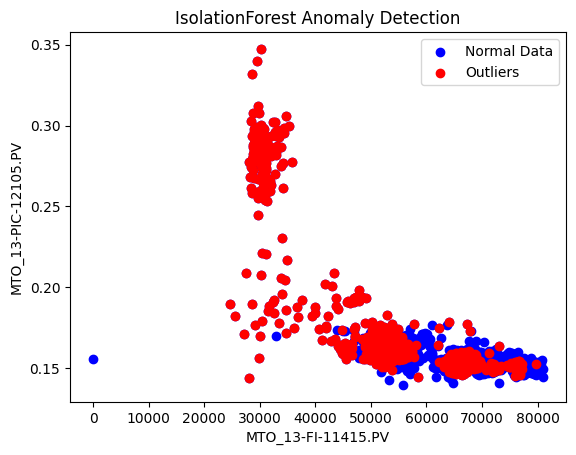

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Đọc file CSV
file_path = "../../data/Compressor_2022_June-Oct.csv"  # Đường dẫn tới file CSV của bạn
pandas_df = pd.read_csv(file_path)

# Hiển thị dữ liệu ban đầu
print("Dữ liệu ban đầu:")
print(pandas_df.head())

# Lấy danh sách header và bỏ qua cột đầu tiên (Timestamp)
columns = pandas_df.columns

# Chọn các cột dữ liệu cần thiết cho mô hình IsolationForest (bỏ qua cột Timestamp)
features = pandas_df[columns[1:]].values  # Giả sử các cột còn lại là các đặc trưng cần thiết

# Áp dụng IsolationForest lên dữ liệu từ CSV
clf = IsolationForest(max_samples=100, random_state=42, contamination=0.1)
clf.fit(features)

# Chạy dự đoán trên tập dữ liệu từ CSV
predictions = clf.predict(features)

# Chia kết quả thành 2 nhóm: normal (1) và outlier (-1)
normal_data = pandas_df[predictions == 1]
outlier_data = pandas_df[predictions == -1]

# Hiển thị kết quả accuracy
accuracy_normal = (predictions == 1).sum() / len(predictions)
accuracy_outlier = (predictions == -1).sum() / len(predictions)
print("Accuracy with Normal Data: ", accuracy_normal)
print("Accuracy In Outlier Detection: ", accuracy_outlier)

# Vẽ biểu đồ để trực quan hóa các điểm bất thường
plt.title("IsolationForest Anomaly Detection")
plt.scatter(features[:, 0], features[:, 1], c='blue', label='Normal Data')
plt.scatter(outlier_data[columns[1]].values, outlier_data[columns[2]].values, c='red', label='Outliers')  # Cột 2 và 3 là ví dụ
plt.xlabel(columns[1])
plt.ylabel(columns[2])
plt.legend()
plt.show()
